# Challenge 3 - Advanced Classification and Evaluation Metrics

Welcome to challenge #3! You know the drill by now i.e., the MCQ section and the code challenge section.

Good luck! :)

## Section 1: Multiple Choice Questions

### Q1. Which statement is **true** regarding **precision** in a multi-class classification context? (1 point)

**Options**:  
1. Precision is the fraction of actual positives that were predicted positive.  
2. Precision is the fraction of predicted positives that are actual positives.  
3. Precision is the fraction of negative predictions that are correct.

In [8]:
def answer_q1():
    """
    Q1: Which statement is **true** regarding **precision** in a multi-class classification context? (1 point)
    """

    options = {
        1: "Precision is the fraction of actual positives that were predicted positive",
        2: "Precision is the fraction of predicted positives that are actual positives",
        3: "Precision is the fraction of negative predictions that are correct"
    }

    # TODO: return the correct option number
    return options[2]

print(f'Q1: Which statement is **true** regarding **precision** in a multi-class classification context? (1 point)\nAnswer: {answer_q1()}')

Q1: Which statement is **true** regarding **precision** in a multi-class classification context? (1 point)
Answer: Precision is the fraction of predicted positives that are actual positives


### Q2. Which statement correctly describes the confusion matrix in a multi-class setting? (1 point)
**Options:**
1. It’s only valid for binary classification, not used for multi-class.
2. It’s an NxN array for N classes, comparing predicted vs. actual class labels.
3. It only shows the total correct vs. total incorrect predictions, no class breakdown.

In [9]:
def answer_q2():
    """
    Q2: Which statement correctly describes the confusion matrix in a multi-class setting? (1 point)
    """

    options = {
        1: "It’s only valid for binary classification, not used for multi-class",
        2: "It’s an NxN array for N classes, comparing predicted vs. actual class labels",
        3: "It only shows the total correct vs. total incorrect predictions, no class breakdown"
    }

    # TODO: return the correct option number
    return options[2]

print(f'Q2: Which statement correctly describes the confusion matrix in a multi-class setting?\nAnswer: {answer_q2()}')

Q2: Which statement correctly describes the confusion matrix in a multi-class setting?
Answer: It’s an NxN array for N classes, comparing predicted vs. actual class labels


### Q3. Which classifier typically uses bagging plus random subsets of features to reduce variance? (1 point)
**Options:**
1. Decision Tree
2. Random Forest
3. Naive Bayes

In [10]:
def answer_q3():
    """
    Q3: Which classifier typically uses bagging plus random subsets of features to reduce variance? (1 point)
    """

    options = {
        1: "Decision Tree",
        2: "Random Forest",
        3: "Naive Bayes"
    }

    # TODO: return the correct option number
    return options[2]

print(f'Q3: Which classifier typically uses bagging plus random subsets of features to reduce variance?\nAnswer: {answer_q3()}')

Q3: Which classifier typically uses bagging plus random subsets of features to reduce variance?
Answer: Random Forest


### Q4. If we see a high recall but low precision for a certain class, what does that usually imply? (1 point)
**Options:**
1. The model rarely finds actual positives for that class.
2. The model finds most actual positives (few false negatives), but also mislabels many negatives as that class (many false positives).
3. The model completely fails to detect that class at all.

In [11]:
def answer_q4():
    """
    Q3: If we see a high recall but low precision for a certain class, what does that usually imply? (1 point)
    """

    options = {
        1: "The model rarely finds actual positives for that class",
        2: "The model finds most actual positives (few false negatives), but also mislabels many negatives as that class (many false positives)",
        3: "The model completely fails to detect that class at all"
    }

    # TODO: return the correct option number
    return options[2]

print(f'Q3: If we see a high recall but low precision for a certain class, what does that usually imply?\nAnswer: {answer_q4()}')

Q3: If we see a high recall but low precision for a certain class, what does that usually imply?
Answer: The model finds most actual positives (few false negatives), but also mislabels many negatives as that class (many false positives)


---

## Section 2: Code challenge (5 points)

For this code challenge, you will work with the [UCI Car Evaluation dataset](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set). A summary of the dataset is as follows.

### Features:
- **buying**: Buying price of the car (vhigh, high, med, low)
- **maint**: Price of the maintenance (vhigh, high, med, low)
- **doors**: Number of doors (2, 3, 4, 5more)
- **persons**: Capacity in terms of persons to carry (2, 4, more)
- **lug_boot**: Size of the luggage boot (small, med, big)
- **safety**: Estimated safety of the car (low, med, high)

### Class Labels:
- **unacc**: Unacceptable
- **acc**: Acceptable
- **good**: Good
- **vgood**: Very Good

To pass this section of the weekly challenge, uncomment/fill in code where necessary (marked with a 'TODO:' comment).

In [12]:
# Common imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

### 1. Load & Encode Car Dataset (1 point)

**Goals** for `load_and_encode_car_data()`
1. Reads car.csv.
2. Encodes 6 features (buying, maint, doors, persons, lug_boot, safety).
    e.g. one-hot or custom mapping.
3. Maps class -> integer: unacc=0, acc=1, good=2, vgood=3.
4. Returns (X, y) as arrays.

In [ ]:
def load_and_encode_car_data():
    """
    1) read 'car.csv'
    2) encode the 6 features to numeric or one-hot
    3) map class to {0,1,2,3}
    4) return X, y
    """
    # TODO
    df = pd.read_csv('car.csv')
    #display(df['class'])
    encoder = LabelEncoder()
    for col in ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']:
        df[col] = encoder.fit_transform(df[col])
    df['class'] = df['class'].map({'unacc':0, 'acc':1, 'good':2, 'vgood':3})
    X = df.drop(columns=['class'])
    y = df['class']
    return X,y
    pass

# demonstration
X, y = load_and_encode_car_data()
#print(y)
print("Shapes:", X.shape, y.shape)
    
pass

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

Shapes: (1728, 6) (1728,)


### 2. Train Baseline Model (1 point)

**Goals** for `train_baseline_model(X, y)`:
1. Split data (test_size=0.2, random_state=42).
2. Use a simple classifier (logistic or naive_bayes, etc.).
3. Return (model, X_test, y_test, y_pred).

In [14]:
def train_classifier(X, y):
    """
    1. split X,y
    2. pick a classifier
    3. fit & predict 
    4. return (model, X_test, y_test, y_pred)
    """
    X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(x_test)
    return model, x_test, y_test, y_pred
    pass

### 3. Generate Confusion Matrix (1 point)

**Goals**:
1.  `generate_confmatrix(y_true, y_pred)` → returns an NxN confusion matrix array from scikit-learn

In [24]:
def generate_confmatrix(y_true, y_pred):
    """
    Return confusion_matrix array (sklearn).
    """
    # TODO
    return confusion_matrix(y_true=y_true, y_pred=y_pred)
    pass

### 4. Compute F1 score (1 point)

**Goals** for `manual_f1_for_class(y_true, y_pred, class_idx)`:
1. Use scikit-learn to get precision, recall for that single class, e.g. by calling `precision_score(..., labels=[class_idx], average='macro')` or `average='binary'` approach.
2. Then manually compute F1 using the formula (no direct scikit calls for F1).
3. Return the F1 score.


In [25]:
def manual_f1_for_class(y_true, y_pred, class_idx):
    """
    1) use scikit to get precision, recall for 'class_idx' only
    2) compute f1 score manually
    return that float
    """
    # TODO
    precision = precision_score(y_true=y_true, y_pred=y_pred, labels=[class_idx], average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = (2*precision*recall)/(precision+recall)
    return f1 
    pass

### 5. Generate Classification Report (1 point)

**Goals**

1. Generate a classification report for your trained model and return the report (string value).

In [26]:
def generate_classification_report(y_true, y_pred):
    """
    calls sklearn's classification_report
    returns it
    """
    # TODO
    return classification_report(y_true,y_pred)
    pass


# optional demonstration
X, y = load_and_encode_car_data()
model, X_te, y_te, y_pr = train_classifier(X,y)
print("Generate confmatrix:")
cm = generate_confmatrix(y_te, y_pr)
print(cm)
f1class0 = manual_f1_for_class(y_te, y_pr, class_idx=0)
print("F1 for class 0 manually:", f1class0)
rep = generate_classification_report(y_te, y_pr)
print(rep)


0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

Generate confmatrix:
[[235   0   0   0]
 [  2  74   7   0]
 [  0   0  11   0]
 [  0   1   0  16]]
F1 for class 0 manually: 0.974587774095143
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       235
           1       0.99      0.89      0.94        83
           2       0.61      1.00      0.76        11
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.96      0.92       346
weighted avg       0.98      0.97      0.97       346



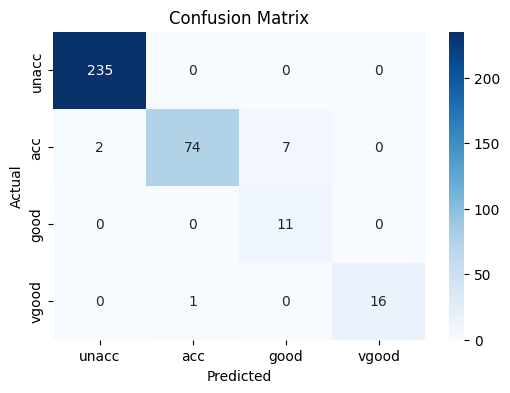

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['unacc', 'acc', 'good', 'vgood']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()